In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

In [3]:
# One hot encoding for each char in "hello"
# h, e, l, o
h = [1, 0, 0, 0] # 0
e = [0, 1, 0, 0] # 1
l = [0, 0, 1, 0] # 2
o = [0, 0, 0, 1] # 3

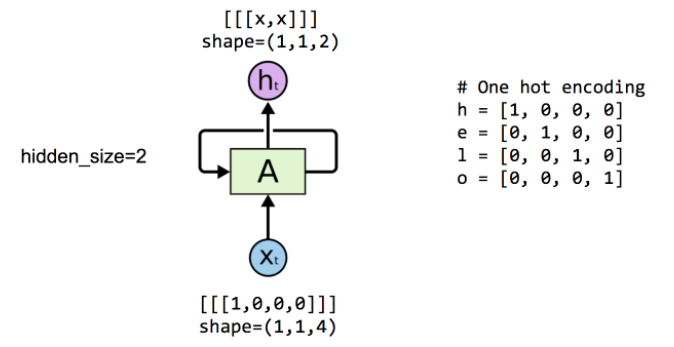

dimension: input (4) output (2)

In [4]:
with tf.variable_scope('one_cell') as scope:
    hidden_size = 2 # output size
    cell = tf.keras.layers.SimpleRNNCell(units=hidden_size)
    print(cell.output_size, cell.state_size)
    
    x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1, 0, 0, 0]]]
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval()) # 일단 shape만 확인

2 2
array([[[1., 0., 0., 0.]]], dtype=float32)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
array([[[ 0.76009977, -0.19117554]]], dtype=float32)


In [5]:
with tf.variable_scope('one_cell') as scope:
    hidden_size = 2
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size)
    print(cell.output_size, cell.state_size)
    
    x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1, 0, 0, 0]]]
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
2 LSTMStateTuple(c=2, h=2)
array([[[1., 0., 0., 0.]]], dtype=float32)
array([[[-0.07409777, -0.08805303]]], dtype=float32)


## Sequence 만들기

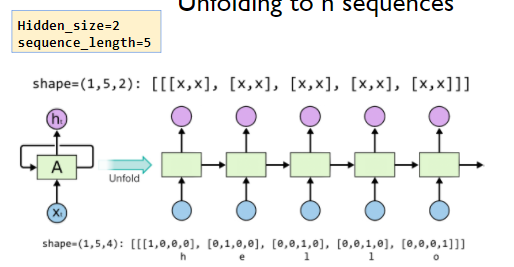

In [6]:
with tf.variable_scope('two_sequences') as scope:
    hidden_size = 2
    cell = tf.keras.layers.SimpleRNNCell(units=hidden_size)
    x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
    print(x_data.shape)
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

(1, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)
array([[[ 0.03457216,  0.02705104],
        [ 0.57207525,  0.23255244],
        [ 0.6604985 , -0.6435776 ],
        [ 0.45622   , -0.92041487],
        [ 0.24451752, -0.95481443]]], dtype=float32)


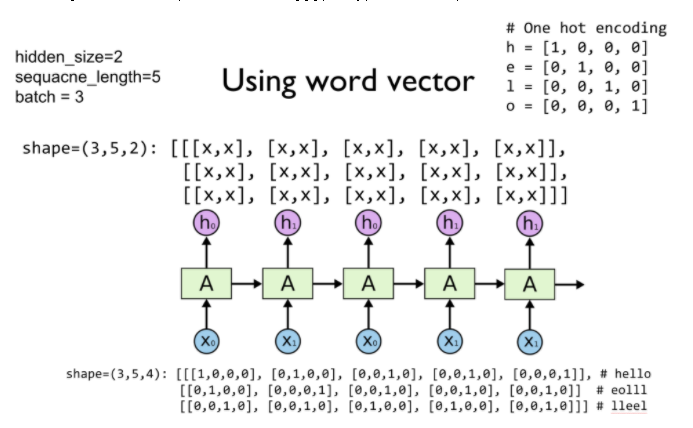

In [7]:
with tf.variable_scope('3_batches') as scope:
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                        [l, l, e, e, l]],dtype=np.float32)
    pp.pprint(x_data)
    pp.pprint(x_data.shape)
    
    hidden_size = 2
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    outputs, _state = tf.nn.dynamic_rnn(
                            cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
(3, 5, 4)
array([[[-0.05567757,  0.03502405],
        [-0.09466538,  0.10587095],
        [-0.21706198,  0.13434957],
        [-0.29372406,  0.17911325],
        [-0.13947304,  0.15252462]],

       [[-0.03823724,  0.07339063],
        [ 0.01738968,  0.02691423],
        [-0.1366384 ,  0.08545703],
        [-0.24371278,  0.13837785],
        [-0.3118967 ,  0.18234476]],

       [[-0.15690793,  0.06525391],
        [-0.2617906 ,  0.12026677],
        [-0.21157286,  0.1956478 ],
        [-0.18127742,  0.22486529],
        [-0.2676638 ,  0.21139558]]], dtype=float32)


dynamic_rnn hyper parameter  
* sequence_length :  int32/int64 vector sized batch_size  
입력 시퀀스 길이가 가변길이일 경우 지정해준다. 데이터 샘플의 입력 시퀀스 길이를 1D tensor로 지정해줌

In [8]:
with tf.variable_scope('3_batches_dynamic_length') as scope:
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    hidden_size = 2
    cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_size, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(
        cell, x_data, sequence_length=[5, 3, 4], dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Use tf.cast instead.
array([[[ 0.1477438 , -0.0189136 ],
        [ 0.07394604,  0.0536789 ],
        [-0.01008676,  0.1255435 ],
        [-0.10719734,  0.15138905],
        [-0.03496031,  0.14818057]],

       [[-0.00930294,  0.0584056 ],
        [ 0.06752997,  0.10785518],
        [-0.04075322,  0.15325978],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[-0.08865719,  0.06509452],
        [-0.

RNN Cell의 최초 state값을 0으로 초기화

In [9]:
with tf.variable_scope('initial_scope') as scope:
    batch_size = 3
    x_data = np.array([[h, e, l, l, o],
                      [e, o, l, l, l],
                      [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    hidden_size = 2
    cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_size, state_is_tuple=True)
    initial_state = cell.zero_state(batch_size, tf.float32)
    outputs, _state = tf.nn.dynamic_rnn(cell, x_data, initial_state=initial_state, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[ 0.06079139,  0.02388757],
        [-0.09346373,  0.07541759],
        [-0.0201578 ,  0.11751593],
        [ 0.05182232,  0.14646325],
        [-0.04038035,  0.03426379]],

       [[-0.15620501,  0.06015395],
        [-0.13463394, -0.00939493],
        [-0.1181315 ,  0.06214887],
        [-0.0276743 ,  0.11526713],
        [ 0.04564856,  0.14564244]],

       [[ 0.07439549,  0.05706661],
        [ 0.13311175,  0.09247568],
        [-0.04609077,  0.13950862],
        [-0.18629202,  0.19284555],
        [-0.12058442,  0.1967238 ]]], dtype=float32)
